<a href="https://colab.research.google.com/github/taylor33189-beep/Taylor_Hoskins_Repository/blob/main/Permutation_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating all 1144066 possible splits of the data...
Done generating all splits.

Taking 10000 random samples of splits...
Done sampling.



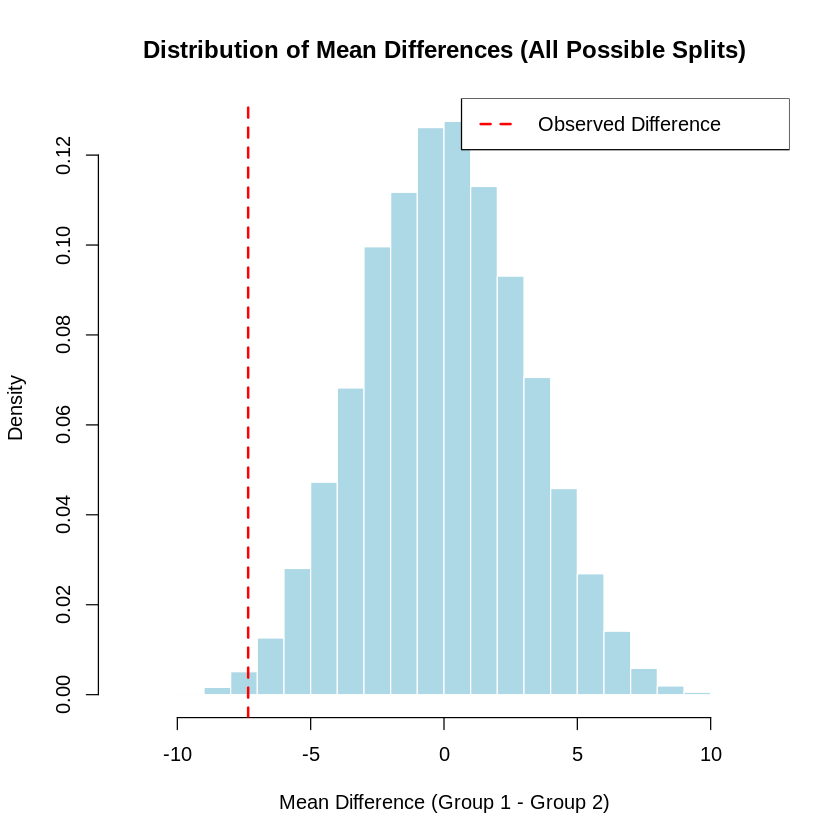

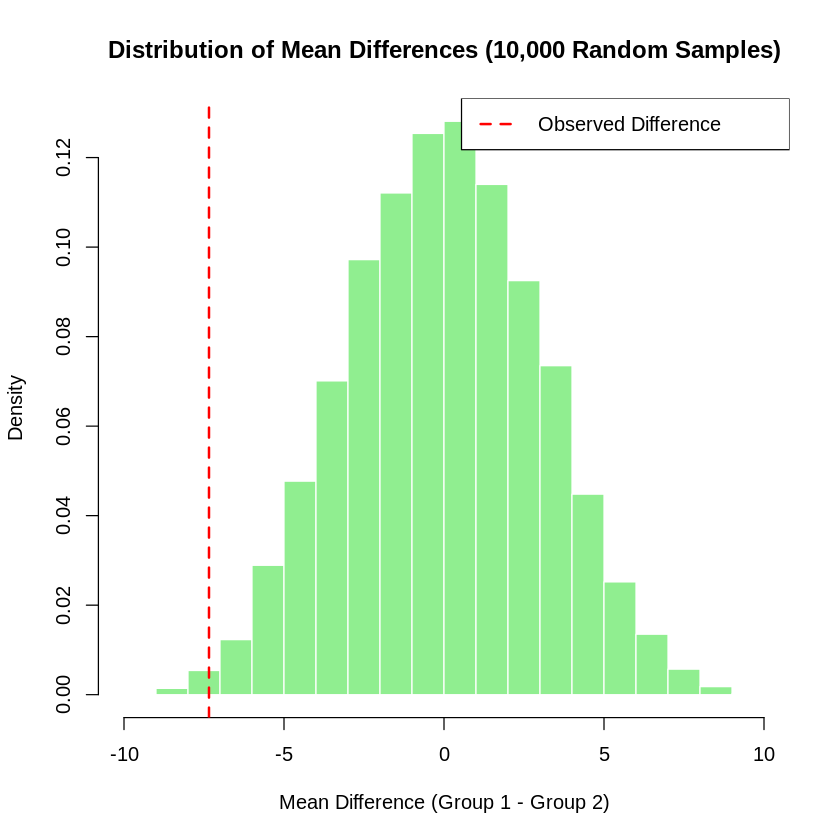

In [3]:

library(gtools)


bodyfat <- read.csv('bodyfat.csv', header = FALSE)

# Give meaningful names to the columns.
names(bodyfat) <- c("BodyFat", "Gender")

# Separate the body fat data for men (Gender == 1) and women (Gender == 2).
men <- bodyfat$BodyFat[bodyfat$Gender == 1]
women <- bodyfat$BodyFat[bodyfat$Gender == 2]

# Calculate the difference in average body fat between men and women.
observed_diff <- mean(men) - mean(women)


# Combine all the body fat data into one big group.
combined_data <- c(men, women)

# Find out the total number of people in our data.
N <- length(combined_data)

# Find out how many men and women are in our original groups.
n1 <- length(men) # Number of men
n2 <- length(women) # Number of women

# --- Method 1: Generate all possible ways to split the combined data ---
# Find the number of ways to choose n1 (number of men) items from N (total) items.
num_permutations <- choose(N, n1)

cat("Generating all", num_permutations, "possible splits of the data...\n")

# Get all possible combinations of which data points go into the "men" group.
# The 'combinations' function from the gtools package does this.
perm_indices <- combinations(N, n1)

# Create a place to store the difference in means for each possible split.
perm_diffs_full <- numeric(num_permutations)

# Loop through each possible split of the data.
for (i in 1:num_permutations) {
  # Get the data points for the first group based on the current split.
  group1_data <- combined_data[perm_indices[i, ]]
  # The rest of the data points form the second group.
  group2_data <- combined_data[-perm_indices[i, ]]

  # Calculate the difference in the average body fat for this split and save it.
  perm_diffs_full[i] <- mean(group1_data) - mean(group2_data)
}
cat("Done generating all splits.\n\n")

# --- Calculate the p-value from the full set of possible splits ---
# The p-value tells us how often we see a difference as big as our observed difference.
# Look at the absolute differences because we are interested in differences in either direction.
p_value_full <- sum(abs(perm_diffs_full) >= abs(observed_diff)) / num_permutations

# --- Visualize the results from the full set of splits ---
# Draw a histogram to show the distribution of mean differences from all possible splits.
hist(perm_diffs_full,
     main = "Distribution of Mean Differences (All Possible Splits)", # Title of the plot
     xlab = "Mean Difference (Group 1 - Group 2)", # Label for the horizontal axis
     freq = FALSE, # Show proportion instead of counts
     col = "lightblue", # Color of the bars
     border = "white") # Color of the bar borders

# Add a vertical line to show the observed difference.
abline(v = observed_diff, col = "red", lwd = 2, lty = 2)

# Add a legend to explain the red line.
legend("topright",
       legend = c("Observed Difference"),
       col = "red",
       lwd = 2,
       lty = 2)


# --- Method 2: Repeat the test by taking a smaller sample of splits ---
num_samples <- 10000 # How many random splits we want to try
perm_diffs_sample <- numeric(num_samples) # Place to store the differences for the samples

cat("Taking", num_samples, "random samples of splits...\n")
for (i in 1:num_samples) {
  # Randomly mix up all the combined body fat data.
  shuffled_data <- sample(combined_data)

  # Split the shuffled data into two groups of the same size as our original groups.
  group1_data_shuffled <- shuffled_data[1:n1]
  group2_data_shuffled <- shuffled_data[(n1+1):N]

  # Calculate the difference in average body fat for this random split and save it.
  perm_diffs_sample[i] <- mean(group1_data_shuffled) - mean(group2_data_shuffled)
}
cat("Done sampling.\n\n")

# --- Calculate the p-value from the sampled splits ---
# Similar to the full test, find how often the sampled differences are as extreme as the observed difference.
p_value_sample <- sum(abs(perm_diffs_sample) >= abs(observed_diff)) / num_samples

# --- Visualize the results from the sampled splits ---
# Draw a histogram to show the distribution of mean differences from the sampled splits.
hist(perm_diffs_sample,
     main = "Distribution of Mean Differences (10,000 Random Samples)", # Title of the plot
     xlab = "Mean Difference (Group 1 - Group 2)", # Label for the horizontal axis
     freq = FALSE, # Show density
     col = "lightgreen", # Color of the bars
     border = "white") # Color of the bar borders

# Add a vertical line to show the observed difference.
abline(v = observed_diff, col = "red", lwd = 2, lty = 2)

# Add a legend to explain the red line.
legend("topright",
       legend = c("Observed Difference"),
       col = "red",
       lwd = 2,
       lty = 2)
